<a href="https://colab.research.google.com/github/daniel199316/ModeladoYsimulacion/blob/master/Copia_de_Copia_de_Root_finding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Root finding Methods


### The Task

How can we find the root $x_0$ of a function $f(x)$, i.e.
$$f(x_0) = 0,$$
if we cannot determine it with pencil and paper.

Note that there could be more than one root and we would like to have some control over which root is computed.

### Example

We would like to know where the function $g(x) = x$ intersects the function $h(x) = e^{-x}$. In other words, we need to solve
$$x = e^{-x}.$$
This is equivalent to finding the root of $f(x) = e^{-x} − x = 0:$
$$f(x_0)=e^{−x_0} −x_0 =0.$$
Let us plot the two functions g and h to gauge whether there might be a root and, if so, where approximately.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We see that the intersection appears near $x = 0.6$. Since both $g$ and $h$ are monotonic functions, they only intersect once. Correspondingly, f should have one unique root near x = 0.6, as is shown in the graph below.

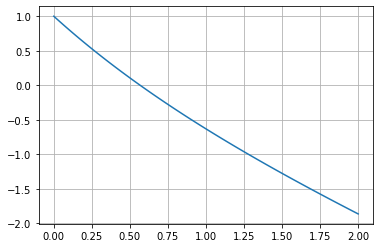

In [0]:
x = np.linspace(0,2,100)
g = x
h = np.exp(-x)
f = np.exp(-x)-x
#plt.plot(x,g,x,h)
plt.plot(x,f)
plt.grid()

## Bisection Algorithm



How can we find this root?

Well, we know that the root definitely lies between $x = 0$ and $x = 1$ since $f(x)$ is monotonically decreasing and
$$f(0) = 1,$$
and hence positive, and
$$f(1) = \frac{1}{e} − 1 = −0.6321,$$
and hence negative. The root must lie somewhere in between.

The strategy is now to "zero in" on the root by checking values of the function closer and closer to the (unknown) root.

To do so, let’s divide the interval $[0, 1]$ whose endpoints we have just studied, into halves by choosing the midpoint $x = 0.5$. The value of $f$ at the midpoint is
$$f (0.5) = 0.1065,$$
and therefore positive. Since $f(1) < 0$, we now know that the root lies somewhere between $x = 0.5$ and $x = 1$. Similar to the last step, we now choose the midpoint of the interval $[0.5, 1]$ to check the value of the function:
$$f(0.75) = −0.2776.$$
The root must therefore fall within the interval $[0.5, 0.75]$.

We can continue to repeat these steps, resulting in ever smaller intervals in which the root must lie. It can happen, although it is unlikely, that one of the midpoints that we finally choose coincides with the root. This is a highly unusual case though.
We truncate this method when we are satisfied with the precision with which we have determined the root. It is simply given by the width of the last interval. Note that we cannot exceed the machine precision of our computer, setting a limit to our division of intervals.
The above method is called the __bisection algorithm__.

We can now write the bisection algorithm systematically.
Given a (continuous) function $f(x)$, a root, if it exists, can be approximated in the following way:
Find two values $x_p$ and $x_m$ with $f(x_p) > 0$ and $f(x_m) < 0$. Then, follow these steps:
1. Choose the midpoint $x_\mathrm{next} = \frac{x_p+x_m}{2}.$
2. If $f(x_\mathrm{next})$ has the same sign as $f(x_p)$, then we set $x_p = x_\mathrm{next}$.
3. Otherwise, we set $x_m = x_\mathrm{next}$.
4. Repeat the previous three steps until the desired accuracy is reached.

It is as simple as that. Let's determine the root of $f(x)$ up to a given accuracy.

In [13]:
tol = 1e-15

x_m = 0 #initial point
x_p = 1 #final point
diff = np.abs(x_m-x_p)

while diff > tol :
  x_next = (x_m+x_p)/2
  f_next = np.exp(-x_next)-x_next
  f_p = np.exp(-x_p)-x_p

  if(f_next*f_p) >0:
    x_p = x_next
  else:
    x_m = x_next
  diff = np.abs(x_m - x_p)
  ite = ite+1
print("the root of f(x) = 0 is %f with interations %d"%(x_p,ite))
#coger dos puntos a los extremos e ir cortando hasta encontrar el punto medio

import sympy as sp

x= sp.symbols("x")
f = sp.exp(-x)-x
f_1 = sp.solve(f,x)
from scipy.special import lambertw
a = lambertw(1)

print("the analytical result is %f"%a)


the root of f(x) = 0 is 0.567143 with interations 200
the analytical result is 0.567143


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


## Newton-Raphson Algorithm



The idea is to start with a guess $x_1$ and the corresponding point on the graph $(x_1 , f(x_1))$. Let’s pick $x_1 = −0.5$. Then we "follow" the line tangent to the graph at that point until we hit the x-axis.

The intersection of tangent line and $x$-axis gives us a new estimate, $x_2$, of the root. As we can see, we are indeed closer to the real root now.

We can repeat this procedure, i.e. following a tangent line at $x_2$ until we hit the $x$-axis again. This yields our next guess $x_3$, and so on.

From the previous plot, we can see that the difference $\Delta x$ (where $\Delta x = x_\mathrm{next} − x_\mathrm{cur})$ between the current guess, $x_\mathrm{cur}$, and the next guess, $x_\mathrm{next}$, is related to the slope of the tangent line, $f′(x_\mathrm{cur})$, via (note the minus sign)
$$f′(x_\mathrm{cur}) = −\frac{f(x_\mathrm{cur})}{\Delta x}.$$

This yields
$$x_\mathrm{next} =x_\mathrm{cur} +\Delta x = x_\mathrm{cur} − \frac{f(x_\mathrm{cur})}{f'(x_\mathrm{cur})}.$$
This procedure can be formulated as the following __Newton-Raphson algorithm__ (also called Newton’s method):
1. Guess a value $x_\mathrm{cur}$ of the root of the function $f(x)$. Sometimes, plotting helps to guess a value (see above).
2. If there is more than one root, try to choose a value close to the root one is interested in.
3. Set $x_\mathrm{next} = x_\mathrm{cur} − \frac{f(x_\mathrm{cur})}{f'(x_\mathrm{cur})}$ as the next estimate of the root.
4. Set $x_\mathrm{cur} = x_\mathrm{next}$.
5. Repeat steps 3 and 4 until desired accuracy is achieved.



Accuracy can refer to two phenomena:
1. When the algorithm converges, $\Delta x$ ultimately decreases with each iteration. The question is: at what value of $\Delta x$ should we stop our iterative procedure?
2. How close is $f(x_\mathrm{cur})$ to zero?

Note: In each case, we cannot be sure how close we really are to the actual root $x_0$. This has a lot to do with the behavior of the function $f$ near $x_0$.
- In case 1, $\Delta x$ could in principle increase again during the next iteration.
- In case 2, the magnitude of $f(x_\mathrm{cur})$ could in principle increase again in the next iteration.

If the root lies in a region where $f(x)$ is nearly linear, the algorithm will converge quickly, much faster than the bisection algorithm.

However, there is generally no guarantee that the algorithm converges. Two phenomena frequently occur when the Newton-Raphson algorithm is applied. Let us discuss them one by one.

__Problem No. 1:__
The derivative $f′(x_\mathrm{cur})$ can sometimes become very small, making $\Delta x = − \frac{f(x_\mathrm{cur})}{f′(x_\mathrm{cur})}$ very large. This is the case near local minima and maxima, or potentially at a (horizontal) inflection
point.

The next guess $x_\mathrm{next}$ is then far away from the actual root. The computer code may stop due to numbers too large in nature, or one enters the region of another root. In other words, one does not return to anywhere near the root of interest.
In this case, the initial guess needs to be changed. Or we can limit the step size $\Delta x$.

__Problem No. 2:__
The algorithm does neither converge or diverge. Rather, it remains within the vicinity of the root, oscillating in an infinite loop about the actual root without approaching it.

Again, the initial guess needs to be changed. Or we need to reduce the step size further (relaxation): we can replace $\Delta x$ by $\gamma \Delta x$, with $0 < \gamma < 1$.
___

Sometimes, it can be useful to use the slower but reliable bisection method first so as to get close enough to the actual root to provide a good initial guess for the faster Newton-Raphson method. The latter takes over at some point, providing better convergence.

Another useful trick is to approximate the derivative $f′(x_\mathrm{cur})$ by 
$$f′(x_\mathrm{cur}) \approx \frac{f(x_\mathrm{cur} + \delta x)−f(x_\mathrm{cur})}{\delta x}$$
for some small value $\delta x$. This comes in handy when the derivative cannot be computed easily in analytical form and a numerical estimate is required.

__Example 2:__

We want to solve the equation
$$ 2 - x^4 = \tanh(x)$$
for $x > 0$. Hence, we need to solve
$$f(x) = 2 - x^4 - \tanh(x).$$
Our algorithm reads
$$
\begin{align}
x_\mathrm{next} = x_\mathrm{cur} - \frac{f(x_\mathrm{cur})}{f'(x_\mathrm{cur})} = \frac{2-x_\mathrm{cur}^4-\tanh(x_\mathrm{cur})}{-4 x_\mathrm{cur}^3-\frac{1}{\cosh(x_\mathrm{cur})^2}}.
\end{align}
$$
Plotting $f(x)$ helps us in making an initial guess.

We choose $x_\mathrm{cur} = x_1 = 1.0$.

We now iterate and find the following successive estimates for the root for the first 5 iterations (up to 12 significant digits):

We see that 5 iterations are sufficient in this case!
The bisection algorithm would require many more iterations for the same accuracy.

The value of $f(x)$ for our final root estimate is
$$f(1.05053505396) =  -2.22044604925 \times 10^{-16}.$$
A very good estimate!

__Note:__
Newton’s method can be extended to higher dimensions, i.e. having $k$ variables and $k$ functions of which we need to find the roots simultaneously. This is particularly relevant for numerical solutions of differential equations. However, these intricacies of Newton’s method will not be covered in this module.